In [5]:
import random
import numpy as np
import sys

In [165]:
class Sender:
    """
    A Q-learning agent that sends messages to a Receiver

    """

    def __init__(self, num_sym:int, grid_rows:int, grid_cols:int, alpha_i:float, alpha_f:float, num_ep:int, epsilon:float, discount:float):
        """
        Initializes this agent with a state, set of possible actions, and a means of storing Q-values

        :param num_sym: The number of arbitrary symbols available for sending
        :type num_sym: int
        :param grid_rows: The number of rows in the grid
        :type grid_rows: int
        :param grid_cols: The number of columns in the grid
        :type grid_cols: int
        :param alpha_i: The initial learning rate
        :type alpha: float
        :param alpha_f: The final learning rate
        :type alpha: float
        :param num_ep: The total number of episodes
        :type num_ep: int
        :param epsilon: The epsilon in epsilon-greedy exploration
        :type epsilon: float
        :param discount: The discount factor
        :type discount: float
        """
        self.actions = range(num_sym)
        self.alpha = alpha_i
        self.alpha_i = alpha_i
        self.alpha_f = alpha_f
        self.num_ep = num_ep
        self.epsilon = epsilon
        self.discount = discount

        # Q[s, a] should be init as all zeroes. 
        self.q_vals = {}
        for x in range(grid_cols):
            for y in range(grid_rows):
                self.q_vals[(x, y)] = {}
                for act in self.actions:
                    self.q_vals[(x, y)][act] = 0

    def select_action(self, state):
        """
        This function is called every time the agent must act. It produces the action that the agent will take
        based on its current state

        :param state: the state the agent is acting from, in the form (x,y), which are the coordinates of the prize
        :type state: (int, int)
        :return: The symbol to be transmitted (must be an int < N)
        :rtype: int
        """
        # use epsilon greedy algorithm 
        if np.random.rand() > self.epsilon:
            best_move = max(self.q_vals[state], key=self.q_vals[state].get)
        else:
            best_move = np.random.choice(self.actions)
        return best_move
        

    def update_q(self, old_state, action, reward):
        """
        This function is called after an action is resolved so that the agent can update its Q-values

        :param old_state: the state the agent was in when it acted, in the form (x,y), which are the coordinates
                          of the prize
        :type old_state: (int, int)
        :param action: the action that was taken
        :type action: int
        :param reward: the reward that was received
        :type reward: float
        """
        self.q_vals[old_state][action] += self.alpha * (reward - self.q_vals[old_state][action])


class Receiver:
    """
    A Q-learning agent that receives a message from a Sender and then navigates a grid

    """

    def __init__(self, num_sym:int, grid_rows:int, grid_cols:int, alpha_i:float, alpha_f:float, num_ep:int, epsilon:float, discount:float):
        """
        Initializes this agent with a state, set of possible actions, and a means of storing Q-values

        :param num_sym: The number of arbitrary symbols available for sending
        :type num_sym: int
        :param grid_rows: The number of rows in the grid
        :type grid_rows: int
        :param grid_cols: The number of columns in the grid
        :type grid_cols: int
        :param alpha_i: The initial learning rate
        :type alpha: float
        :param alpha_f: The final learning rate
        :type alpha: float
        :param num_ep: The total number of episodes
        :type num_ep: int
        :param epsilon: The epsilon in epsilon-greedy exploration
        :type epsilon: float
        :param discount: The discount factor
        :type discount: float
        """

        self.actions = [0,1,2,3] # Note: these correspond to [up, down, left, right]
        self.alpha = alpha_i
        self.alpha_i = alpha_i
        self.alpha_f = alpha_f
        self.num_ep = num_ep
        self.epsilon = epsilon
        self.discount = discount

        # Q[s, a] should be init arbitrarily. A table or matrix with nested loop
        # m, x, y
        self.q_vals = {}
        for m in range(num_sym): 
            for x in range(grid_cols):
                for y in range(grid_rows):
                    self.q_vals[(m, x, y)] = {}
                    for act in self.actions:
                        self.q_vals[(m, x, y)][act] = 0

    def select_action(self, state):
        """
        This function is called every time the agent must act. It produces the action that the agent will take
        based on its current state
        :param state: the state the agent is acting from, in the form (m,x,y), where m is the message received
                      and (x,y) are the board coordinates
        :type state: (int, int, int)
        :return: The direction to move, where 0 is up, 1 is down, 2 is left, and 3 is right
        :rtype: int
        """

        # use epsilon greedy algorithm 
        if np.random.rand() > self.epsilon:
            best_move = max(self.q_vals[state], key=self.q_vals[state].get)
        else:
            best_move = np.random.choice(self.actions)
        
        return best_move

    def update_q(self, old_state, new_state, action, reward):
        """
        This function is called after an action is resolved so that the agent can update its Q-values

        :param old_state: the state the agent was in when it acted in the form (m,x,y), where m is the message received
                          and (x,y) are the board coordinates
        :type old_state: (int, int, int)
        :param new_state: the state the agent entered after it acted
        :type new_state: (int, int, int)
        :param action: the action that was taken
        :type action: int
        :param reward: the reward that was received
        :type reward: float
        """
        self.q_vals[old_state][action] += self.alpha * (
                reward + self.discount * max(self.q_vals[new_state].values()) 
                - self.q_vals[old_state][action])


def get_grid(grid_name:str):
    """
    This function produces one of the three grids defined in the assignment as a nested list

    :param grid_name: the name of the grid. Should be one of 'fourroom', 'maze', or 'empty'
    :type grid_name: str
    :return: The corresponding grid, where True indicates a wall and False a space
    :rtype: list[list[bool]]
    """
    grid = [[False for i in range(5)] for j in range(5)] # default case is 'empty'
    if grid_name == 'fourroom':
        grid[0][2] = True
        grid[2][0] = True
        grid[2][1] = True
        grid[2][3] = True
        grid[2][4] = True
        grid[4][2] = True
    elif grid_name == 'maze':
        grid[1][1] = True
        grid[1][2] = True
        grid[1][3] = True
        grid[2][3] = True
        grid[3][1] = True
        grid[4][1] = True
        grid[4][2] = True
        grid[4][3] = True
        grid[4][4] = True
    return grid


def legal_move(posn_x:int, posn_y:int, move_id:int, grid:list[list[bool]]):
    """
    Produces the new position after a move starting from (posn_x,posn_y) if it is legal on the given grid (i.e. not
    out of bounds or into a wall)

    :param posn_x: The x position (column) from which the move originates
    :type posn_x: int
    :param posn_y: The y position (row) from which the move originates
    :type posn_y: int
    :param move_id: The direction to move, where 0 is up, 1 is down, 2 is left, and 3 is right
    :type move_id: int
    :param grid: The grid on which to move, where False indicates a space and True a wall
    :type grid: list[list[bool]]
    :return: The new (x,y) position if the move was legal, or the old position if it was not
    :rtype: (int, int)
    """
    moves = [[0,-1],[0,1],[-1,0],[1,0]]
    new_x = posn_x + moves[move_id][0]
    new_y = posn_y + moves[move_id][1]
    result = (new_x,new_y)
    if new_x < 0 or new_y < 0 or new_x >= len(grid[0]) or new_y >= len(grid):
        result = (posn_x,posn_y)
    else:
        if grid[new_y][new_x]:
            result = (posn_x,posn_y)
    return result


def run_episodes(sender:Sender, receiver:Receiver, grid:list[list[bool]], num_ep:int, delta:float):
    """
    Runs the reinforcement learning scenario for the specified number of episodes

    :param sender: The Sender agent
    :type sender: Sender
    :param receiver: The Receiver agent
    :type receiver: Receiver
    :param grid: The grid on which to move, where False indicates a space and True a wall
    :type grid: list[list[bool]]
    :param num_ep: The number of episodes
    :type num_ep: int
    :param delta: The chance of termination after every step of the receiver
    :type delta: float [0,1]
    :return: A list of the reward received by each agent at the end of every episode
    :rtype: list[float]

    struct: sender takes action, while receiver acts until it is terminated .
    """
    reward_vals = []

    sender_alpha_change = (sender.alpha_i - sender.alpha_f) / sender.num_ep
    receiver_alpha_change = (receiver.alpha_i - receiver.alpha_f) / receiver.num_ep

    # Episode loop
    for ep in range(num_ep):
        # Set receiver starting position
        receiver_x = 2
        receiver_y = 2

        # Choose prize position
        prize_x = np.random.randint(len(grid[0]))
        prize_y = np.random.randint(len(grid))
        while grid[prize_y][prize_x] or (prize_x == receiver_x and prize_y == receiver_y):
            prize_x = np.random.randint(len(grid[0]))
            prize_y = np.random.randint(len(grid))

        # Initialize new episode
        # sender acts
        sender_state = (prize_x, prize_y)
        msg = sender.select_action(sender_state)

        # Receiver loop
        # (receiver acts, check for prize, check for random termination, update receiver Q-value)
        terminate = False
        steps = 0
        reward = 0
        while not terminate:
            cur_state = (msg, receiver_x, receiver_y)
            action = receiver.select_action(cur_state)
            new_x, new_y = legal_move(receiver_x, receiver_y, action, grid)
            next_state = (msg, new_x, new_y)

            # check for prize
            if new_x == prize_x and new_y == prize_y:
                terminate = True
                reward = 1
            
            # q update
            receiver.update_q(cur_state, next_state, action, reward)
            receiver_x, receiver_y = new_x, new_y

            # rand terminate
            if np.random.rand() < delta:
                terminate = True
            
            steps += 1

            
        # Finish up episode

        # treat as if discount is 0 because we enter a random next state
        # (update sender Q-value, update alpha values, append reward to output list)
        reward *= sender.discount ** steps
        sender.update_q(sender_state, msg, reward)
        sender.alpha -= sender_alpha_change
        receiver.alpha -= receiver_alpha_change
        reward_vals.append(reward)

    return reward_vals

In [169]:
# Define parameters here
class RL:
    def __init__(self, 
                 num_learn_episodes=100000, 
                 num_test_episodes=1000, 
                 grid_name='fourroom',
                 num_signals=1,
                 discount=0.95,
                 delta=0.05,
                 epsilon=0.1,
                 alpha_init=0.9,
                 alpha_final=0.01):
        
        self.num_learn_episodes = num_learn_episodes
        self.num_test_episodes = num_test_episodes
        self.grid_name = grid_name
        self.grid = get_grid(grid_name)
        self.num_signals = num_signals
        self.discount = discount
        self.delta = delta
        self.epsilon = epsilon
        self.alpha_init = alpha_init
        self.alpha_final = alpha_final

        # Initialize agents
        self.sender = Sender(self.num_signals, len(self.grid), len(self.grid[0]), self.alpha_init, self.alpha_final, self.num_learn_episodes, self.epsilon, self.discount)
        self.receiver = Receiver(self.num_signals, len(self.grid), len(self.grid[0]), self.alpha_init, self.alpha_final, self.num_learn_episodes, self.epsilon, self.discount)

    def train(self):
        # Learn
        learn_rewards = run_episodes(self.sender, self.receiver, self.grid, self.num_learn_episodes, self.delta)
        return learn_rewards
    
    def test(self):
        # Test
        self.sender.epsilon = 0.0
        self.sender.alpha = 0.0
        self.sender.alpha_i = 0.0
        self.sender.alpha_f = 0.0
        self.receiver.epsilon = 0.0
        self.receiver.alpha = 0.0
        self.receiver.alpha_i = 0.0
        self.receiver.alpha_f = 0.0
        test_rewards = run_episodes(self.sender, self.receiver, self.grid, self.num_test_episodes, self.delta)
        
        return test_rewards

rl = RL(num_learn_episodes=100000, 
        num_test_episodes=1000, 
        grid_name='fourroom', 
        num_signals=5, 
        discount=0.95,
        delta=0.05,
        epsilon=0.4,
        alpha_init=0.9,
        alpha_final=0.01)

learn_rewards = rl.train()
test_rewards = rl.test()

# Print results
print("Average reward during learning: " + str(np.average(learn_rewards)))
print("Average reward during testing: " + str(np.average(test_rewards)))

Average reward during learning: 0.315785891686989
Average reward during testing: 0.7647534378124998


# discounted avg reward for optimal search strat


In [167]:
rl = RL(num_learn_episodes=100000, 
        num_test_episodes=1000, 
        grid_name='empty', 
        num_signals=1, 
        discount=0.95,
        delta=0.05,
        epsilon=0.1,
        alpha_init=0.9,
        alpha_final=0.01)

learn_rewards = rl.train()
test_rewards = rl.test()

# Print results
print("Average reward during learning: " + str(np.average(learn_rewards)))
print("Average reward during testing: " + str(np.average(test_rewards)))

Average reward during learning: 0.15171735236051806
Average reward during testing: 0.16524190156250002


In [170]:
# discounted average reward of ideal: 
gamma = 0.95
np.average([gamma ** i for i in range(1, 25)])

0.560508689065138

In [171]:
rl = RL(num_learn_episodes=100000, 
            num_test_episodes=1000, 
            grid_name='fourroom', 
            num_signals=4, 
            discount=0.95,
            delta=0.05,
            epsilon=0.1,
            alpha_init=0.9,
            alpha_final=0.01)

learn_rewards = rl.train()
test_rewards = rl.test()

# Print results
print("Average reward during learning: " + str(np.average(learn_rewards)))
print("Average reward during testing: " + str(np.average(test_rewards)))

Average reward during learning: 0.5856514307654537
Average reward during testing: 0.7558849918749998


2. running 4 room grid


In [172]:
nep = [10, 100, 1000, 10000, 50000, 100000]
epsilon = [0.01, 0.1, 0.4]
num_tests = 10

res = []
for n in nep:
    for ep in epsilon:
        for i in range(num_tests):
            rl = RL(num_learn_episodes=n, 
                    num_test_episodes=1000, 
                    grid_name='fourroom', 
                    num_signals=4, 
                    discount=0.95,
                    delta=0.05,
                    epsilon=ep,
                    alpha_init=0.9,
                    alpha_final=0.01)

            learn_rewards = rl.train()
            test_rewards = rl.test()

            res.append({"nep": n, "epsilon": ep, "log_nep": np.log(n), "learn": np.average(learn_rewards), "test": np.average(test_rewards)})

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
df = pd.DataFrame(res)
df01 = df.loc[df['epsilon'] == 0.01]
df1 = df.loc[df['epsilon'] == 0.1]
df4 = df.loc[df['epsilon'] == 0.4]

grouped_df01 = df01.groupby(by=['nep']).agg(['mean', 'std'])
grouped_df1 = df1.groupby(by=['nep']).agg(['mean', 'std'])
grouped_df4 = df4.groupby(by=['nep']).agg(['mean', 'std'])

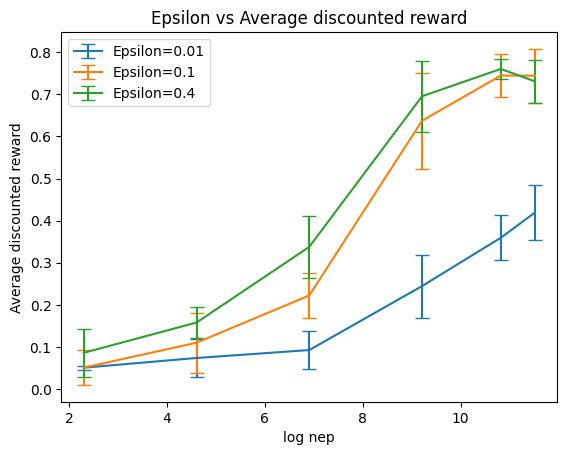

In [184]:
plt.errorbar(grouped_df01[('log_nep', 'mean')], grouped_df01[('test', 'mean')], yerr=grouped_df01[('test', 'std')], capsize=5, label='Epsilon=0.01')
plt.errorbar(grouped_df1[('log_nep', 'mean')], grouped_df1[('test', 'mean')], yerr=grouped_df1[('test', 'std')], capsize=5, label='Epsilon=0.1')
plt.errorbar(grouped_df4[('log_nep', 'mean')], grouped_df4[('test', 'mean')], yerr=grouped_df4[('test', 'std')], capsize=5, label='Epsilon=0.4')
plt.legend()
plt.xlabel('log nep')
plt.ylabel('Average discounted reward')
plt.title("Epsilon vs Average discounted reward")
plt.show()

Drawing policies


In [176]:
rl = RL(num_learn_episodes=100000, 
        num_test_episodes=1000, 
        grid_name='fourroom', 
        num_signals=4, 
        discount=0.95,
        delta=0.05,
        epsilon=ep,
        alpha_init=0.9,
        alpha_final=0.01)

learn_rewards = rl.train()
test_rewards = rl.test()

In [177]:
msgs = [0, 1, 2, 3]
grid = get_grid('fourroom')
for msg in msgs:
    visited = set()
    for x in range(5):
        for y in range(5):
            cur_state = (msg, x, y)
            action = rl.receiver.select_action(cur_state)
            new_x, new_y = legal_move(x, y, action, grid)
            next_state = (msg, new_x, new_y)

            print(f"{cur_state} -> {next_state}")



for x in range(5):
    for y in range(5):
        msg = rl.sender.select_action((x, y))
        print(x, y, msg)


(0, 0, 0) -> (0, 1, 0)
(0, 0, 1) -> (0, 1, 1)
(0, 0, 2) -> (0, 0, 1)
(0, 0, 3) -> (0, 1, 3)
(0, 0, 4) -> (0, 0, 3)
(0, 1, 0) -> (0, 1, 1)
(0, 1, 1) -> (0, 2, 1)
(0, 1, 2) -> (0, 1, 1)
(0, 1, 3) -> (0, 1, 4)
(0, 1, 4) -> (0, 0, 4)
(0, 2, 0) -> (0, 2, 0)
(0, 2, 1) -> (0, 2, 2)
(0, 2, 2) -> (0, 2, 3)
(0, 2, 3) -> (0, 1, 3)
(0, 2, 4) -> (0, 2, 3)
(0, 3, 0) -> (0, 3, 1)
(0, 3, 1) -> (0, 2, 1)
(0, 3, 2) -> (0, 3, 1)
(0, 3, 3) -> (0, 2, 3)
(0, 3, 4) -> (0, 3, 3)
(0, 4, 0) -> (0, 3, 0)
(0, 4, 1) -> (0, 3, 1)
(0, 4, 2) -> (0, 4, 1)
(0, 4, 3) -> (0, 3, 3)
(0, 4, 4) -> (0, 3, 4)
(1, 0, 0) -> (1, 1, 0)
(1, 0, 1) -> (1, 1, 1)
(1, 0, 2) -> (1, 0, 1)
(1, 0, 3) -> (1, 1, 3)
(1, 0, 4) -> (1, 0, 3)
(1, 1, 0) -> (1, 1, 1)
(1, 1, 1) -> (1, 2, 1)
(1, 1, 2) -> (1, 1, 1)
(1, 1, 3) -> (1, 2, 3)
(1, 1, 4) -> (1, 1, 3)
(1, 2, 0) -> (1, 2, 0)
(1, 2, 1) -> (1, 2, 2)
(1, 2, 2) -> (1, 2, 3)
(1, 2, 3) -> (1, 3, 3)
(1, 2, 4) -> (1, 2, 3)
(1, 3, 0) -> (1, 3, 1)
(1, 3, 1) -> (1, 2, 1)
(1, 3, 2) -> (1, 3, 1)
(1, 3, 3) -

3. same tests, diff values


In [178]:
epsilon = 0.1
N = [2, 4, 10]
nep = [10, 100, 1000, 10000, 50000, 100000]
num_tests = 10

res3 = []
for num in N:
    for n in nep:
        for i in range(num_tests):
            rl = RL(num_learn_episodes=n, 
                    num_test_episodes=1000, 
                    grid_name='fourroom',
                    num_signals=num, 
                    discount=0.95,
                    delta=0.05,
                    epsilon=epsilon,
                    alpha_init=0.9,
                    alpha_final=0.01)

            learn_rewards = rl.train()
            test_rewards = rl.test()
            
            res3.append({"nep": n, "N": num, "log_nep": np.log(n), "learn": np.average(learn_rewards), "test": np.average(test_rewards)})

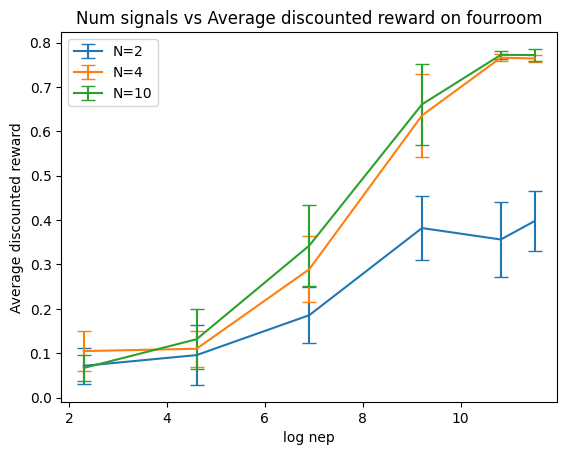

In [185]:
df = pd.DataFrame(res3)
N = [2, 4, 10]
for num in N: 
    df_mod = df.loc[df['N'] == num]
    grouped = df_mod.groupby(by=['nep']).agg(['mean', 'std'])
    plt.errorbar(grouped[('log_nep', 'mean')], grouped[('test', 'mean')], yerr=grouped[('test', 'std')], capsize=5, label=f'N={num}')

plt.legend()
plt.xlabel('log nep')
plt.ylabel('Average discounted reward')
plt.title("Num signals vs Average discounted reward on fourroom")
plt.show()

4. same but with maze


In [180]:
epsilon = 0.1
N = [2, 3, 5]
nep = [10, 100, 1000, 10000, 50000, 100000]
num_tests = 10

res4 = []
for num in N:
    for n in nep:
        for i in range(num_tests):
            rl = RL(num_learn_episodes=n, 
                    num_test_episodes=1000, 
                    grid_name='maze', 
                    num_signals=num, 
                    discount=0.95,
                    delta=0.05,
                    epsilon=epsilon,
                    alpha_init=0.9,
                    alpha_final=0.01)

            learn_rewards = rl.train()
            test_rewards = rl.test()
            res4.append({"nep": n, "N": num, "log_nep": np.log(n), "learn": np.average(learn_rewards), "test": np.average(test_rewards)})

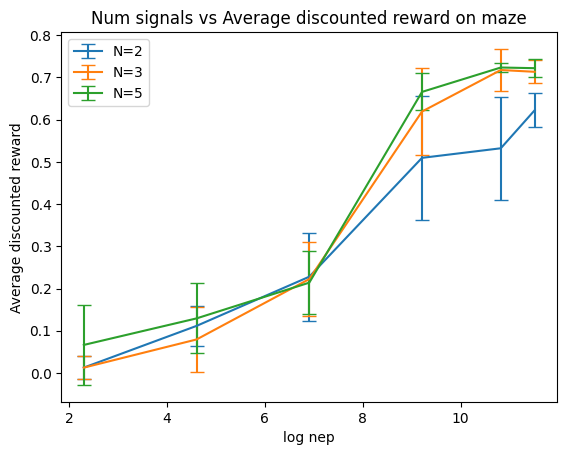

In [186]:
df = pd.DataFrame(res4)
N = [2, 3, 5]
for num in N: 
    df_mod = df.loc[df['N'] == num]
    grouped = df_mod.groupby(by=['nep']).agg(['mean', 'std'])
    plt.errorbar(grouped[('log_nep', 'mean')], grouped[('test', 'mean')], yerr=grouped[('test', 'std')], capsize=5, label=f'N={num}')

plt.legend()
plt.xlabel('log nep')
plt.ylabel('Average discounted reward')
plt.title("Num signals vs Average discounted reward on maze")
plt.show()

5. empty grid


In [182]:
epsilon = 0.1
N = [1]
nep = [10, 100, 1000, 10000, 50000, 100000]
num_tests = 10

res5 = []
for num in N:
    for n in nep:
        for i in range(num_tests):
            rl = RL(num_learn_episodes=n, 
                    num_test_episodes=1000, 
                    grid_name='empty', 
                    num_signals=num, 
                    discount=0.95,
                    delta=0.05,
                    epsilon=epsilon,
                    alpha_init=0.9,
                    alpha_final=0.01)

            learn_rewards = rl.train()
            test_rewards = rl.test()
            res5.append({"nep": n, "log_nep": np.log(n), "learn": np.average(learn_rewards), "test": np.average(test_rewards)})

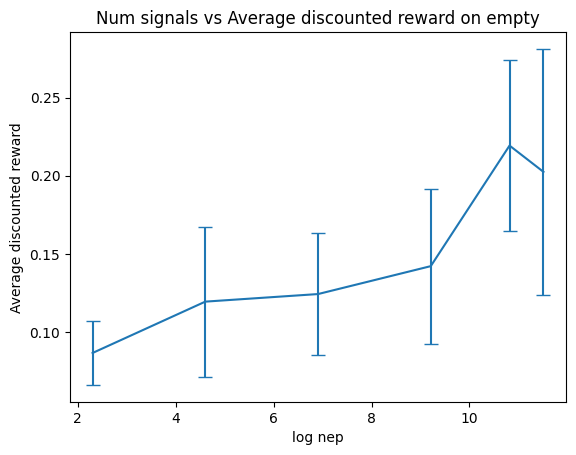

In [189]:
df = pd.DataFrame(res5)
grouped = df.groupby(by=['nep']).agg(['mean', 'std'])
plt.errorbar(grouped[('log_nep', 'mean')], grouped[('test', 'mean')], yerr=grouped[('test', 'std')], capsize=5)

plt.xlabel('log nep')
plt.ylabel('Average discounted reward')
plt.title("Num signals vs Average discounted reward on empty")
plt.show()